In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("数据集.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print(df.shape)

(1000, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [5]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [6]:
print(df.isna().sum()) #检查NAN

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
#选出列类型是object的列，并获取列名
obj_cols = df.select_dtypes(include = "object").columns 
print(obj_cols)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [8]:
blank_cnt = (df[obj_cols].astype(str).apply(lambda s: (s.str.strip() == "").sum()))
print(blank_cnt)

# .astype(str): 把每个元素强制转成字符串
# 。astype(str)会将NAN变为nan，不会被识别为缺失值,用.astype("string")

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
dtype: int64


In [9]:
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()
    df.loc[df[c] == "",c] = np.nan

In [10]:
# 检查大小写/空格导致的同义不同写
for c in df.select_dtypes(include = "object").columns:
    raw = df[c].nunique() # 统计c列有多少个不同的值
    norm = df[c].astype(str).str.strip().str.lower().nunique()
    if(norm < raw):
        print("傻逼",c)
# 统一成小写
for c in df.select_dtypes(include = "object").columns:
    df[c] = df[c].str.strip().str.lower()

In [11]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
df["parental level of education"].nunique()
df["parental level of education"].nunique(dropna = False)

6

In [13]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [14]:
# 该cell只能运行一次，因为二次运行时parental level of education的元素变成了数值，map找不到key
education_rank = {"some high school":1,"high school":2,"some college":3,
                  "associate's degree":4,"bachelor's degree":5,"master's degree":6}
df["parental level of education"] = df["parental level of education"].map(education_rank)

In [15]:
df["Average Score"] = (df["math score"] + df["reading score"] + df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,female,group b,5,standard,none,72,72,74,72.666667
1,female,group c,3,standard,completed,69,90,88,82.333333
2,female,group b,6,standard,none,90,95,93,92.666667
3,male,group a,4,free/reduced,none,47,57,44,49.333333
4,male,group c,3,standard,none,76,78,75,76.333333


In [16]:
# wrong: df["High Achiever"] = 1 if df["Average Score"] >=75 else 0
df["High Achiever"] = (df["Average Score"] >= 75).astype(int)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,High Achiever
0,female,group b,5,standard,none,72,72,74,72.666667,0
1,female,group c,3,standard,completed,69,90,88,82.333333,1
2,female,group b,6,standard,none,90,95,93,92.666667,1
3,male,group a,4,free/reduced,none,47,57,44,49.333333,0
4,male,group c,3,standard,none,76,78,75,76.333333,1


### 第二题

In [17]:
df.groupby("parental level of education")["Average Score"].agg(["count","mean","median","max","min"]).reset_index()

,parental level of education,count,mean,median,max,min
0,1,179,65.108007,66.666667,99.000000,9.000000
1,2,196,63.096939,65.000000,95.666667,18.333333
2,3,226,68.476401,68.666667,99.000000,23.333333
3,4,222,69.569069,69.666667,100.000000,31.666667
4,5,118,71.923729,71.166667,100.000000,39.000000
5,6,59,73.598870,73.333333,97.666667,44.666667


<Figure size 1000x500 with 0 Axes>

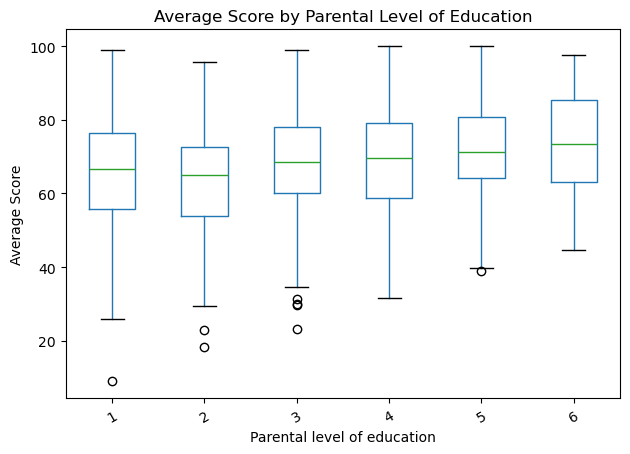

In [18]:
import matplotlib.pyplot as plt

# pd.to_numeric(): 把一列转换为数值
df["Average Score"] = pd.to_numeric(df["Average Score"], errors = "coerce")
plt.figure(figsize = (10, 5))
ax = df.boxplot(column = "Average Score",
               by = "parental level of education",
               grid = False,
               rot = 30)
plt.title("Average Score by Parental Level of Education")
# 去掉pandas自动添加的“超级标题”
plt.suptitle("")
plt.xlabel("Parental level of education")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

从该箱线图中，可以得到一下结论：
- 不同教育程度的家庭，最高分数相差无几，但是最低分数在整体上随着教育水平的提高而增加；
- 平均分的中位数整体上随着教育水平的提高而增加；
- 随着教育水平的提高，整体上方差减小。

In [19]:
df.groupby("test preparation course")[["math score","reading score","writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [20]:
import seaborn as sns

g = sns.catplot(
    data=df_long,
    kind="violin",
    col="Subject",
    x=prep_col, y="Score",
    order=["none", "completed"],
    inner="quartile",
    cut=0,
    sharey=True,
    height=4, aspect=0.9
)
g.set_titles("{col_name}")
g.fig.suptitle("是否参加考试辅导课程：分科成绩分布对比", y=1.05)
plt.show()

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [22]:
import sys
print(sys.executable)

/home/pyodide/this.program
